In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc

###### **(Run this notebook all over (click: "Run All") because in the last cell the dataframe has been modified including index so that cell will not run separately**)

### Reading data

In [2]:
df = pd.read_csv("epa-sea-level.csv")
df.head(5)

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


### Best fit plot with whole data

LinregressResult(slope=0.06304458401213482, intercept=-119.06594196773983, rvalue=0.984757131182585, pvalue=3.788696979113155e-102, stderr=0.0009692118713287152, intercept_stderr=1.886943381242523)


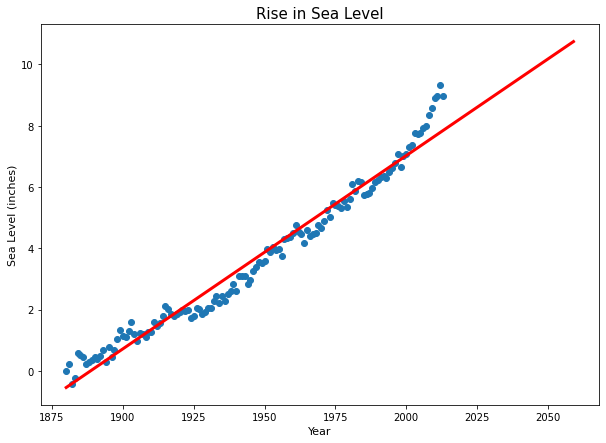

Expected sea level in 2050 is 10.175455257136548 meter


In [3]:
year = df["Year"]
asl = df["CSIRO Adjusted Sea Level"]
print(sc.linregress(year,asl))
rg = list(sc.linregress(year,asl))
slope = rg[0]
intercept=rg[1]
plt.figure(figsize=(10,7))
plt.scatter(year,asl)
year=np.arange(1880,2060,1)
asl_bf = intercept+slope*year
plt.plot(year,asl_bf,"r",linewidth=3)
plt.xlabel("Year",fontsize=11)
plt.ylabel("Sea Level (inches)",fontsize=11)
plt.title("Rise in Sea Level",fontsize=15)
plt.show()
asl_2050=intercept+slope*2050
print(f"Expected sea level in 2050 is {asl_2050} meter")

### Best fit plot with recent data

LinregressResult(slope=0.1664272733318682, intercept=-325.7934668059649, rvalue=0.9762875716140618, pvalue=2.4388064141618245e-09, stderr=0.010652933111541163, intercept_stderr=21.375153425608215)


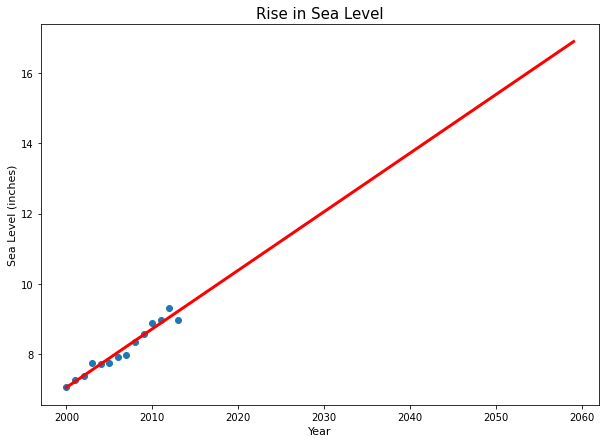

In [4]:
df.set_index("Year",inplace=True)
df["year"] = df.index
years = df.loc[2000:2013]["year"]
asl = df.loc[2000:2013]["CSIRO Adjusted Sea Level"]
print(sc.linregress(years,asl))
rg = list(sc.linregress(years,asl))
slope = rg[0]
intercept=rg[1]
plt.figure(figsize=(10,7))
plt.scatter(years,asl)
year=np.arange(2000,2060,1)
asl_bf = intercept+slope*year
plt.plot(year,asl_bf,"r",linewidth=3)
plt.xlabel("Year",fontsize=11)
plt.ylabel("Sea Level (inches)",fontsize=11)
plt.title("Rise in Sea Level",fontsize=15)
plt.show()

### Predict sea level in 2050

In [5]:
asl_2050=intercept+slope*2050
print(f"Expected sea level in 2050 is {asl_2050} meter")
del df["year"]

Expected sea level in 2050 is 15.382443524364874 meter
